## Code to access the genre and movie poster path of your favourite movie



 
### Movie genre of our favourite movie from IMDB

In [201]:
from  imdb import IMDb
import numpy as np
import pandas as pd
#import http.client
import json
from pandas.io.json import json_normalize

import math


In [2]:
#IMDB

ia = IMDb()
#search the imdb movie databse to get the meta data of my favourite movie
search_MS = ia.search_movie('Man of Steel (2013)')
search_MS

[<Movie id:0770828[http] title:_Man of Steel (2013)_>,
 <Movie id:2953982[http] title:_"Man of Steel (2013) (TV Episode)  - Season 1 | Episode 116  - Maltin on Movies" (2010)_>,
 <Movie id:2999682[http] title:_"Man of Steel (2013) (TV Episode)  - Season 5 | Episode 11  - The Angry Joe Show" (2009)_>,
 <Movie id:3037254[http] title:_"Man of Steel (2013) (TV Episode)  - Season 4 | Episode 6  - Midnight Movie Review" (2010)_>,
 <Movie id:5809454[http] title:_"Man of Steel (2013) (TV Episode) - Chrono-critique" (2012) (mini)_>,
 <Movie id:2996074[http] title:_"Man of Steel (2013) (TV Episode)  - Season 3 | Episode 11  - Half in the Bag" (2011)_>,
 <Movie id:2986326[http] title:_"Man of Steel (2013) (TV Episode)  - Season 1 | Episode 4  - Doogtoons Quickies" (2013)_>,
 <Movie id:2990176[http] title:_"Man of Steel (2013) (TV Episode)  - Season 6 | Episode 4  - Bum Reviews" (2008)_>,
 <Movie id:3012562[http] title:_"How to Fix Man of Steel 2 (2013) (TV Episode)  - Season 2 | Episode 27  - The

In [3]:
#Get the movie id of  favourite movie from the search
Fav_movie = ia.get_movie('0770828')

#Print the genre of Man of Steel movie from IMDB
print( " The genre of Man of Steel movie from IMDB is : ") ,Fav_movie['genre']

 The genre of Man of Steel movie from IMDB is :  [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']


In [4]:
print " The poster path of our favourite movie:" ,Fav_movie['cover url']

 The poster path of our favourite movie: https://images-na.ssl-images-amazon.com/images/M/MV5BMjI5OTYzNjI0Ml5BMl5BanBnXkFtZTcwMzM1NDA1OQ@@._V1._SX96_SY140_.jpg


# Movie genre of our favourite movie from TMDB

In [5]:
import tmdbsimple as tmdb
tmdb.API_KEY = '086e1765d64f7c65a62924f5a9eda3e6'

In [6]:
search = tmdb.Search()
response = search.movie(query ='Man of Steel')

for s in search.results:
    print(s['title'],s['id'] ,s['release_date'])


(u'Man of Steel', 49521, u'2013-06-12')
(u'Man of Steel', 334166, u'1967-03-25')
(u'Untitled Man of Steel Sequel', 416648, u'2020-12-31')
(u'Batman v Superman: Dawn of Justice', 209112, u'2016-03-23')
(u'Hands of Steel', 67221, u'1986-03-26')
(u'Man with the Golden Pistol', 138138, u'1965-12-07')


In [7]:
#Now  considering the movie id from above search
movie_s = tmdb.Movies(49521)
response = movie_s.info()
genre=[]
for j in range(len(movie_s.genres)):
    genre.append(movie_s.genres[j]['name'] )
#Print the genre of Fav movie from TMDB
print( " The genre of Fav movie from TMDB is : ") ,genre


 The genre of Fav movie from TMDB is :  [u'Action', u'Adventure', u'Fantasy', u'Science Fiction']


In [8]:
#print the response to see the poster path `image name
print response

{u'poster_path': u'/xWlaTLnD8NJMTT9PGOD9z5re1SL.jpg', u'production_countries': [{u'iso_3166_1': u'CA', u'name': u'Canada'}, {u'iso_3166_1': u'GB', u'name': u'United Kingdom'}, {u'iso_3166_1': u'US', u'name': u'United States of America'}], u'revenue': 662845518, u'overview': u'A young boy learns that he has extraordinary powers and is not of this earth. As a young man, he journeys to discover where he came from and what he was sent here to do. But the hero in him must emerge if he is to save the world from annihilation and become the symbol of hope for all mankind.', u'video': False, u'id': 49521, u'genres': [{u'id': 28, u'name': u'Action'}, {u'id': 12, u'name': u'Adventure'}, {u'id': 14, u'name': u'Fantasy'}, {u'id': 878, u'name': u'Science Fiction'}], u'title': u'Man of Steel', u'tagline': u'You will believe that a man can fly.', u'vote_count': 5322, u'homepage': u'http://www.manofsteel.com/', u'belongs_to_collection': {u'backdrop_path': u'/csERw2A3XIsGegkzil6UGpyhqfw.jpg', u'poster_p

In [9]:

#Get the configuration info to obtain base url and poster sizes to build the main poster path
config = tmdb.Configuration()
response_c = config.info()

#base_url
base_url = config.images['base_url']
#poster_sizes
psize= config.images['poster_sizes'][6]

#construct the poster url
poster_url = base_url + psize +  movie_s.poster_path
print poster_url


http://image.tmdb.org/t/p/original/xWlaTLnD8NJMTT9PGOD9z5re1SL.jpg


###  At this point lets step aside and  pick Bourne movies and combine the two datasets from IMDB and TMDB to see how  data consistency prevails across the two movie websites

In [208]:
# Movie Bourne from IMDB using API connections


movieid = []
movietitle = []
moviegenre = []
movieurl = []
movieyear = []
movierating = []
search_MS = ia.search_movie('The Bourne')
for i in range(0, len(search_MS)):
    objmovie = ia.get_movie(search_MS[i].movieID) # Search movie using ID
    movieid.append(search_MS[i].movieID) # Create list of movie IDs
    movietitle.append(objmovie.get('title')) # Create list of movie titles
    moviegenre.append(objmovie.get('genre')) # Create list of movie genres
    movieurl.append(objmovie.get('cover url')) # Create list of movie poster URL
    movieyear.append(objmovie.get('year')) # Create list of movie release year
    movierating.append(objmovie.get('rating')) # Create list of movie rating
    time.sleep(1)
#Creating final data frame
imdb_feed = pd.DataFrame({'imdb_id':movieid,'original_title':movietitle, 'imdb_genre':moviegenre, 'imdb_poster_path':movieurl, 'release_date': movieyear, 'imdb_rating': movierating})
imdb_feed.release_date.fillna(1500, inplace=True)
imdb_feed.release_date = movie_df.release_date.astype(int)
imdb_feed.head()

,imdb_genre,imdb_id,imdb_poster_path,imdb_rating,original_title,release_date
0,"[Action, Mystery, Thriller]",0258463,https://images-na.ssl-images-amazon.com/images...,7.9,The Bourne Identity,2002
1,"[Action, Mystery, Thriller]",0372183,https://images-na.ssl-images-amazon.com/images...,7.8,The Bourne Supremacy,2004
2,"[Action, Mystery, Thriller]",0440963,https://images-na.ssl-images-amazon.com/images...,8.1,The Bourne Ultimatum,2007
3,"[Action, Adventure, Mystery, Romance, Thriller]",1194173,https://images-na.ssl-images-amazon.com/images...,6.7,The Bourne Legacy,2012
4,"[Action, Thriller]",2395088,None,NaN,Untitled Jeremy Renner/Bourne Sequel,1500


In [210]:
# Movie Bourne from TMDB
movie_name = 'Bourne'
moviedata = requests.get("http://api.themoviedb.org/3/search/movie?include_adult=false&page=1&query="
             + movie_name +"&language=en-US&api_key=d34bc9fba7aa52b8156fd52d8f59bd08")
moviedetails = moviedata.json()
movie_df = json_normalize(moviedetails['results'])
get_genre = []
for lst in movie_df.genre_ids:
    in_genre = []
    for i in range(0, len(lst)):
        in_genre.append(genre_df.loc[genre_df['id'] == lst[i], 'name'].item())
    get_genre.append(in_genre)
movie_df.loc[:, 'tmdb_genre'] = get_genre
movie_df.release_date = pd.to_datetime(movie_df.release_date)
movie_df.release_date.fillna(1500, inplace=True)
movie_df.release_date = movie_df["release_date"].apply(lambda x : int(x.year))
movie_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,tmdb_genre
0,False,/dtFiuavnsnl0krJAeSmGAOFAhw2.jpg,"[28, 53]",324668,en,Jason Bourne,The most dangerous former operative of the CIA...,5.970991,/aU1PY270BTBUXwAZhgRR2TMUX4u.jpg,2016,Jason Bourne,False,5.8,1862,"[Action, Thriller]"
1,False,/lULx7grVMzc5lGaQH2B2lJ69CCh.jpg,"[28, 18, 53]",2502,en,The Bourne Supremacy,When a CIA operation to purchase classified Ru...,5.099736,/6a74OaZArLNNDHK9SdiLBUu2JYj.jpg,2004,The Bourne Supremacy,False,7.2,2366,"[Action, Drama, Thriller]"
2,False,/2Fr1vqBiDn8xRJM9elcplzHctTN.jpg,"[28, 18, 9648, 53]",2501,en,The Bourne Identity,Wounded to the brink of death and suffering fr...,4.993621,/bXQIL36VQdzJ69lcjQR1WQzJqQR.jpg,2002,The Bourne Identity,False,7.2,3043,"[Action, Drama, Mystery, Thriller]"
3,False,/6WpDOqkZFmhNJ0rwuLJiZVKlZi1.jpg,"[28, 18, 9648, 53]",2503,en,The Bourne Ultimatum,Bourne is brought out of hiding once again by ...,4.294931,/fHho6JYYY0nRcETWSoeI19iZsNF.jpg,2007,The Bourne Ultimatum,False,7.3,2458,"[Action, Drama, Mystery, Thriller]"
4,False,/8kdXppXTbg50prSXsnLJikithmT.jpg,"[28, 53]",49040,en,The Bourne Legacy,"New CIA operative, Aaron Cross experiences lif...",3.936230,/AnKnLsybNhnibvA3mba1ct9Nnb6.jpg,2012,The Bourne Legacy,False,6.0,2352,"[Action, Thriller]"


In [211]:
#Merge to see the datasets  from iMDB and TMDB together
two_source_df = pd.merge(movie_df, imdb_feed, how='inner', on =['original_title', 'release_date'])
two_source_df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,tmdb_genre,imdb_genre,imdb_id,imdb_poster_path,imdb_rating
0,False,/dtFiuavnsnl0krJAeSmGAOFAhw2.jpg,"[28, 53]",324668,en,Jason Bourne,The most dangerous former operative of the CIA...,5.970991,/aU1PY270BTBUXwAZhgRR2TMUX4u.jpg,2016,Jason Bourne,False,5.8,1862,"[Action, Thriller]","[Action, Thriller]",4196776,https://images-na.ssl-images-amazon.com/images...,6.7
1,False,/lULx7grVMzc5lGaQH2B2lJ69CCh.jpg,"[28, 18, 53]",2502,en,The Bourne Supremacy,When a CIA operation to purchase classified Ru...,5.099736,/6a74OaZArLNNDHK9SdiLBUu2JYj.jpg,2004,The Bourne Supremacy,False,7.2,2366,"[Action, Drama, Thriller]","[Action, Mystery, Thriller]",0372183,https://images-na.ssl-images-amazon.com/images...,7.8
2,False,/2Fr1vqBiDn8xRJM9elcplzHctTN.jpg,"[28, 18, 9648, 53]",2501,en,The Bourne Identity,Wounded to the brink of death and suffering fr...,4.993621,/bXQIL36VQdzJ69lcjQR1WQzJqQR.jpg,2002,The Bourne Identity,False,7.2,3043,"[Action, Drama, Mystery, Thriller]","[Action, Mystery, Thriller]",0258463,https://images-na.ssl-images-amazon.com/images...,7.9
3,False,/6WpDOqkZFmhNJ0rwuLJiZVKlZi1.jpg,"[28, 18, 9648, 53]",2503,en,The Bourne Ultimatum,Bourne is brought out of hiding once again by ...,4.294931,/fHho6JYYY0nRcETWSoeI19iZsNF.jpg,2007,The Bourne Ultimatum,False,7.3,2458,"[Action, Drama, Mystery, Thriller]","[Action, Mystery, Thriller]",0440963,https://images-na.ssl-images-amazon.com/images...,8.1
4,False,/8kdXppXTbg50prSXsnLJikithmT.jpg,"[28, 53]",49040,en,The Bourne Legacy,"New CIA operative, Aaron Cross experiences lif...",3.936230,/AnKnLsybNhnibvA3mba1ct9Nnb6.jpg,2012,The Bourne Legacy,False,6.0,2352,"[Action, Thriller]","[Action, Adventure, Mystery, Romance, Thriller]",1194173,https://images-na.ssl-images-amazon.com/images...,6.7


#### Collection of Data of interest which can be helpful to predict genre

In [204]:
# Data of interest which can be helpful are the certifactes o predict genres like horror etc
cert = []
certdata = requests.get("http://api.themoviedb.org/3/certification/movie/list?api_key=086e1765d64f7c65a62924f5a9eda3e6")
certification = certdata.json()
for key, value in certification.items():
    for innerkey, values in value.items():
        temp = json_normalize(certification['certifications'][innerkey])
        temp['type'] = innerkey
        cert.append(temp)
cert = pd.concat(cert, axis=0, ignore_index=True)
cert.head()

,certification,meaning,order,type
0,U,(Tous publics) valid for all audiences.,1,FR
1,12,(Interdit aux moins de 12 ans) unsuitable for ...,3,FR
2,10,(Déconseillé aux moins de 10 ans) unsuitable f...,2,FR
3,16,(Interdit aux moins de 16 ans) unsuitable for ...,4,FR
4,18,(Interdit aux mineurs) unsuitable for children...,5,FR


In [205]:
# Getting all genre descriptions
genredata = requests.get("http://api.themoviedb.org/3/genre/movie/list?language=en-US&api_key=d34bc9fba7aa52b8156fd52d8f59bd08")
genredetails = genredata.json()
genre_df = json_normalize(genredetails['genres'])
genre_df.head()

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime



# Top 10 most popular movies in 2016 according to TMDB and their genres

In [10]:
import requests


#construct the url to pick top 10 most popular movies from 2016
url = 'http://api.themoviedb.org/3/discover/movie?api_key=086e1765d64f7c65a62924f5a9eda3e6&/discover/movie?sort_by=popularity.desc&primary_release_year=2016'
r = requests.get(url)

In [51]:
#populate an empty dataframe to hold top 10 popular results
df = pd.DataFrame(columns =['Movie', 'Popularity','Genre'] )

# The body of the p.tag in the results set is not navigatable but the results are in json format 
config = r.json()
#check the configuration results and pick toop 10
results10 = config['results'][0:10]

for i in range(len(results10)):
    movie_s = tmdb.Movies(config['results'][i]['id'])
    #check the response file to carve out the useful information to construct poster path
    response = movie_s.info()
    genre=''
    for j in range(len(movie_s.genres)):
        #concatenate all genres before loading into the dataframe
        genre = genre + ',' + (movie_s.genres[j]['name'] )
    df.loc[i] = np.array([config['results'][i]['original_title'] , config['results'][i]['popularity'] , genre[1:]])

df.head(10)

,Movie,Popularity,Genre
0,Sing,76.005907,"Animation,Comedy,Drama,Family,Music"
1,Fantastic Beasts and Where to Find Them,39.239379,"Adventure,Action,Fantasy"
2,Finding Dory,31.769363,"Adventure,Animation,Comedy,Family"
3,Deadpool,26.382598,"Action,Adventure,Comedy,Romance"
4,Rogue One: A Star Wars Story,25.082126,"Action,Drama,Science Fiction,War"
5,Doctor Strange,23.441433,"Action,Adventure,Fantasy,Science Fiction"
6,Arrival,22.476241,"Drama,Science Fiction"
7,Captain America: Civil War,21.467025,"Action,Science Fiction"
8,Underworld: Blood Wars,20.082001,"Action,Horror"
9,Lion,15.298543,Drama



# Visualizations of the genre pairs from selected 1000 movies

In [ ]:
import requests
import time

#construct the url to pick top 10 most popular movies from 2016
#api_key = 'd34bc9fba7aa52b8156fd52d8f59bd08'
api_key = '086e1765d64f7c65a62924f5a9eda3e6'
year = 2016
page =1

#populate an empty dataframe to hold 1000 movies at least to find the genre pairs distributions using a heatmap
df_1000 = pd.DataFrame(columns =['Movie', 'Popularity','Genre'] )

while len(df_1000) < 1000 :
    url = 'http://api.themoviedb.org/3/discover/movie?api_key={0}&/discover/movie?primary_release_year={1}&page={2}'.format(api_key,year,page)
    r = requests.get(url)
    # The body of the p.tag in the results set is not navigatable but the results are in json format 
    config = r.json()
    #check the configuration results and pick toop 10
    results1000 = config['results']
    
    for i in range(len(results1000)):
        
        movie_s = tmdb.Movies(config['results'][i]['id'])
        #check the response file to carve out the useful information to construct poster path
        response = movie_s.info()
        genre=''
        for j in range(len(movie_s.genres)):
            #concatenate all genres before loading into the dataframe
            genre = genre + ',' + (movie_s.genres[j]['name'] )
        #Inceememt the rowid from where next data needs to be appended
        rowd= len(df_1000) + i
        df_1000.loc[rowd] = np.array([config['results'][i]['original_title'] , config['results'][i]['popularity'] , genre[1:]])
    
    
    page = page + 1
    time.sleep(20)
    

In [194]:
#Saving it ot a csv file incase we have to re run it again
df_1000.to_csv("df100.csv", sep ='\t' , encoding='utf-8')

In [ ]:

# Jsut copying incase the original dataset is corrupted , so that i can use this backup dataset without hitting the server
df_22 = df_1000

In [ ]:
# creating the genre pairs for every movie and getting the freeeeequency of every pair among the 10000 movies collected
from itertools import combinations
dict = {('Action','Action') :0 }
for i in range(len(df_1000)) :
    Genres_split = list(df_1000.iloc[i]['Genre'].split(","))
    Genres_split.sort()
    Genre_pairs= list(combinations(Genres_split ,2))
    
    for j in range(len(Genre_pairs)):
        if Genre_pairs[j] in dict :
            dict[Genre_pairs[j]] = 1  + dict[Genre_pairs[j]]
        else :
            dict[Genre_pairs[j]] = 1
        

In [216]:
# Look at first few dictionary elements
dict.items()[1:10]

[((u'Adventure', u'Crime'), 13),
 ((u'Fantasy', u'Mystery'), 5),
 ((u'Adventure', u'War'), 6),
 ((u'Action', u'Crime'), 72),
 ((u'Animation', u'Crime'), 1),
 ((u'Crime', u'Family'), 2),
 ((u'Adventure', u'History'), 6),
 ((u'Horror', u'War'), 1),
 ((u'Action', u'Western'), 3)]

In [218]:
# Load the dictionary into a datframe so thatwe can perform pivot functions later on
dd =pd.DataFrame(columns =["Genre1" ,"Genre2" ,"Freq"])
j= 0
for key, value in dict.iteritems() :
    dd.loc[j]= np.array([key[0],key[1],value])
    j = j+1
    
dd.head(5)


,Genre1,Genre2,Freq
0,Action,Animation,17
1,Adventure,Crime,13
2,Fantasy,Mystery,5
3,Adventure,War,6
4,Action,Crime,72


In [219]:
dd  = dd.pivot(index ="Genre1", columns ="Genre2",values = "Freq")
dd.head()

Genre2,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Genre1,,,,,,,,,,,,,,,,,,
Action,0,191,17,56,72,74,23,79,9,19,None,28,7,145,None,170,19,3
Adventure,None,None,54,70,13,50,86,109,6,7,1,14,21,110,None,75,6,4
Animation,None,None,None,60,1,6,101,38,None,None,7,1,8,11,None,1,None,None
Comedy,None,None,None,None,25,60,79,49,1,7,8,6,59,20,None,11,None,None
Crime,None,None,None,None,None,70,2,7,1,5,1,20,4,4,None,80,None,1


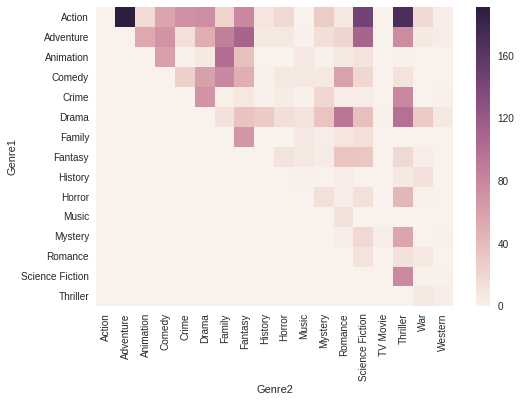

In [199]:
#Visualization of all genre pairs frequencies in a heat map
import matplotlib.pyplot as plt
import seaborn as sns

#Fill NaN with Zeros and convert all objects avlues into float to seaborn
dd = dd.fillna(0)
dd = dd[dd.columns].astype(float)


sns.heatmap(dd)
plt.show()


 From the above plot we can coment that  over a period of 1 year in 2016 , the 1000 movies that we collected, we can tell taht most of the movies made are of Action ,Thriller , Adventures combinations

### Some additional visualizations that we did it from Tableau using the datasets we craeted above


          
<img src="1_RatingComparison_ByGenre.png">

<img src="2_MovieRatings_Genres.png">

<img src="3_PopularityAndGenres.png">


### Challenges with data at hand

1. The sample data obtained from two sources - IMDb and TMDb show that the genre categorizations aren't same always. For example - movie "The Bourne Supremacy" has TMDb genres as Action, Drama, Thriller while IMDb genres are Action, Mystery, Thriller
2. There are 18 genres a movie can be classified into. It is not a binary classification problem
3. Since each movie can be in more than one genres, the classification task for identifying 'one' genre for a given movie would be difficult 
4. The two databases code the actual variable differently so even if both movies have the same genre coding e.g. ['Drama'], the length of the value 'Drama' is different from one database to the other.

### Handling the challenges
1. The first challenge could be addressed by retaining the common genres between the two sources and dropping other genres or consolidating the movie genres would depend on further investigation of data for a given movie
2. Because there are multiple categories, we would have to use one vs rest approach to train the model
3. The idea here is to build up the probabalities of each movie belonging to different genres  say using the mclust , we can use these probabilites and retain those genres which atleast made it to cutoff probabilities
4. Make sure some scraping is needed to correct al the genres



### Handmade Visualization

The visualization drawn by hand represents an idea of identifying the average ratings of each genre across all movies in a given year in both the sources - IMDb and TMDb. A scatter plot would explain movies of which genre were preferred over other genres or were not preferred over other genres. Since the rating system requires votes from various users, there should not be a lot of cases of huge disparity between the data points and hence we should observe a rather smooth curve/pattern emerging from such a plot. The plot is a mere representation of the idea and hence the actual plot could be totally different than the handmade visualization but it should still convey the same message as anticipated above.

<img src="Handmade_Visualization.jpg">

### List of interesting questions
1. Are some genres more popular than others?
2. Average ratings of movies in different genres
3. Does award nominations like Oscars can help in predict the genres
4. Most actors are confined to sepcific genres. 
5. Total revenue across all movies in a given genre year on year - Are some genres are loosing the ability to attract viewers while others are gaining traction?
6. Do some genres get a specific viewer certificate and hence are related to certain age group audience?
7. Borrow the viewership information by genre to determine the audience preferences